In [1]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
column_names = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
                'Savings', 'Employment', 'InstallmentRate', 'PersonalStatusSex',
                'OtherDebtors', 'PresentResidence', 'Property', 'Age',
                'OtherInstallmentPlans', 'Housing', 'NumberExistingCredits',
                'Job', 'NumberPeopleLiable', 'Telephone', 'ForeignWorker', 'Target']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                 sep=' ',
                 names=column_names)

df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1: good, 0: bad
df

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberExistingCredits,Job,NumberPeopleLiable,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


In [3]:
print('Dataset Class distribution:\n', df['Target'].value_counts())

Dataset Class distribution:
 Target
1    700
0    300
Name: count, dtype: int64


In [4]:
print('DatasetData types:\n', df.dtypes)

DatasetData types:
 Status                   object
Duration                  int64
CreditHistory            object
Purpose                  object
CreditAmount              int64
Savings                  object
Employment               object
InstallmentRate           int64
PersonalStatusSex        object
OtherDebtors             object
PresentResidence          int64
Property                 object
Age                       int64
OtherInstallmentPlans    object
Housing                  object
NumberExistingCredits     int64
Job                      object
NumberPeopleLiable        int64
Telephone                object
ForeignWorker            object
Target                    int64
dtype: object


In [5]:
df.describe()

,Duration,CreditAmount,InstallmentRate,PresentResidence,Age,NumberExistingCredits,NumberPeopleLiable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop('Target', axis=1)
y = df['Target']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
                                  ('num', StandardScaler(), numerical_cols)])

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

base_learners = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
                 ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),  # noqa
                 ('svc', SVC(probability=True))]

stacked_model = StackingClassifier(estimators=base_learners,
                                   final_estimator=LogisticRegression())

pipeline = Pipeline([('preprocessing', preprocessor),
                     ('classifier', stacked_model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)  # noqa

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Status', 'CreditHistory',
                                                   'Purpose', 'Savings',
                                                   'Employment',
                                                   'PersonalStatusSex',
                                                   'OtherDebtors', 'Property',
                                                   'OtherInstallmentPlans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'ForeignWorker']),
                                                 ('num', StandardScaler(),
                                                  ['Duration', 'CreditAmount',
                                                   'InstallmentRate',
                                                   'PresentResidence', 'Age',
                                                   'NumberExistingCredits',
                                                   'NumberPeopleLiable'])])),
                ('classifier',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42)),
                                                ('svc', SVC(probability=True))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        60
           1       0.80      0.86      0.83       140

    accuracy                           0.75       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.74      0.75      0.74       200

AUC-ROC: 0.7907142857142857


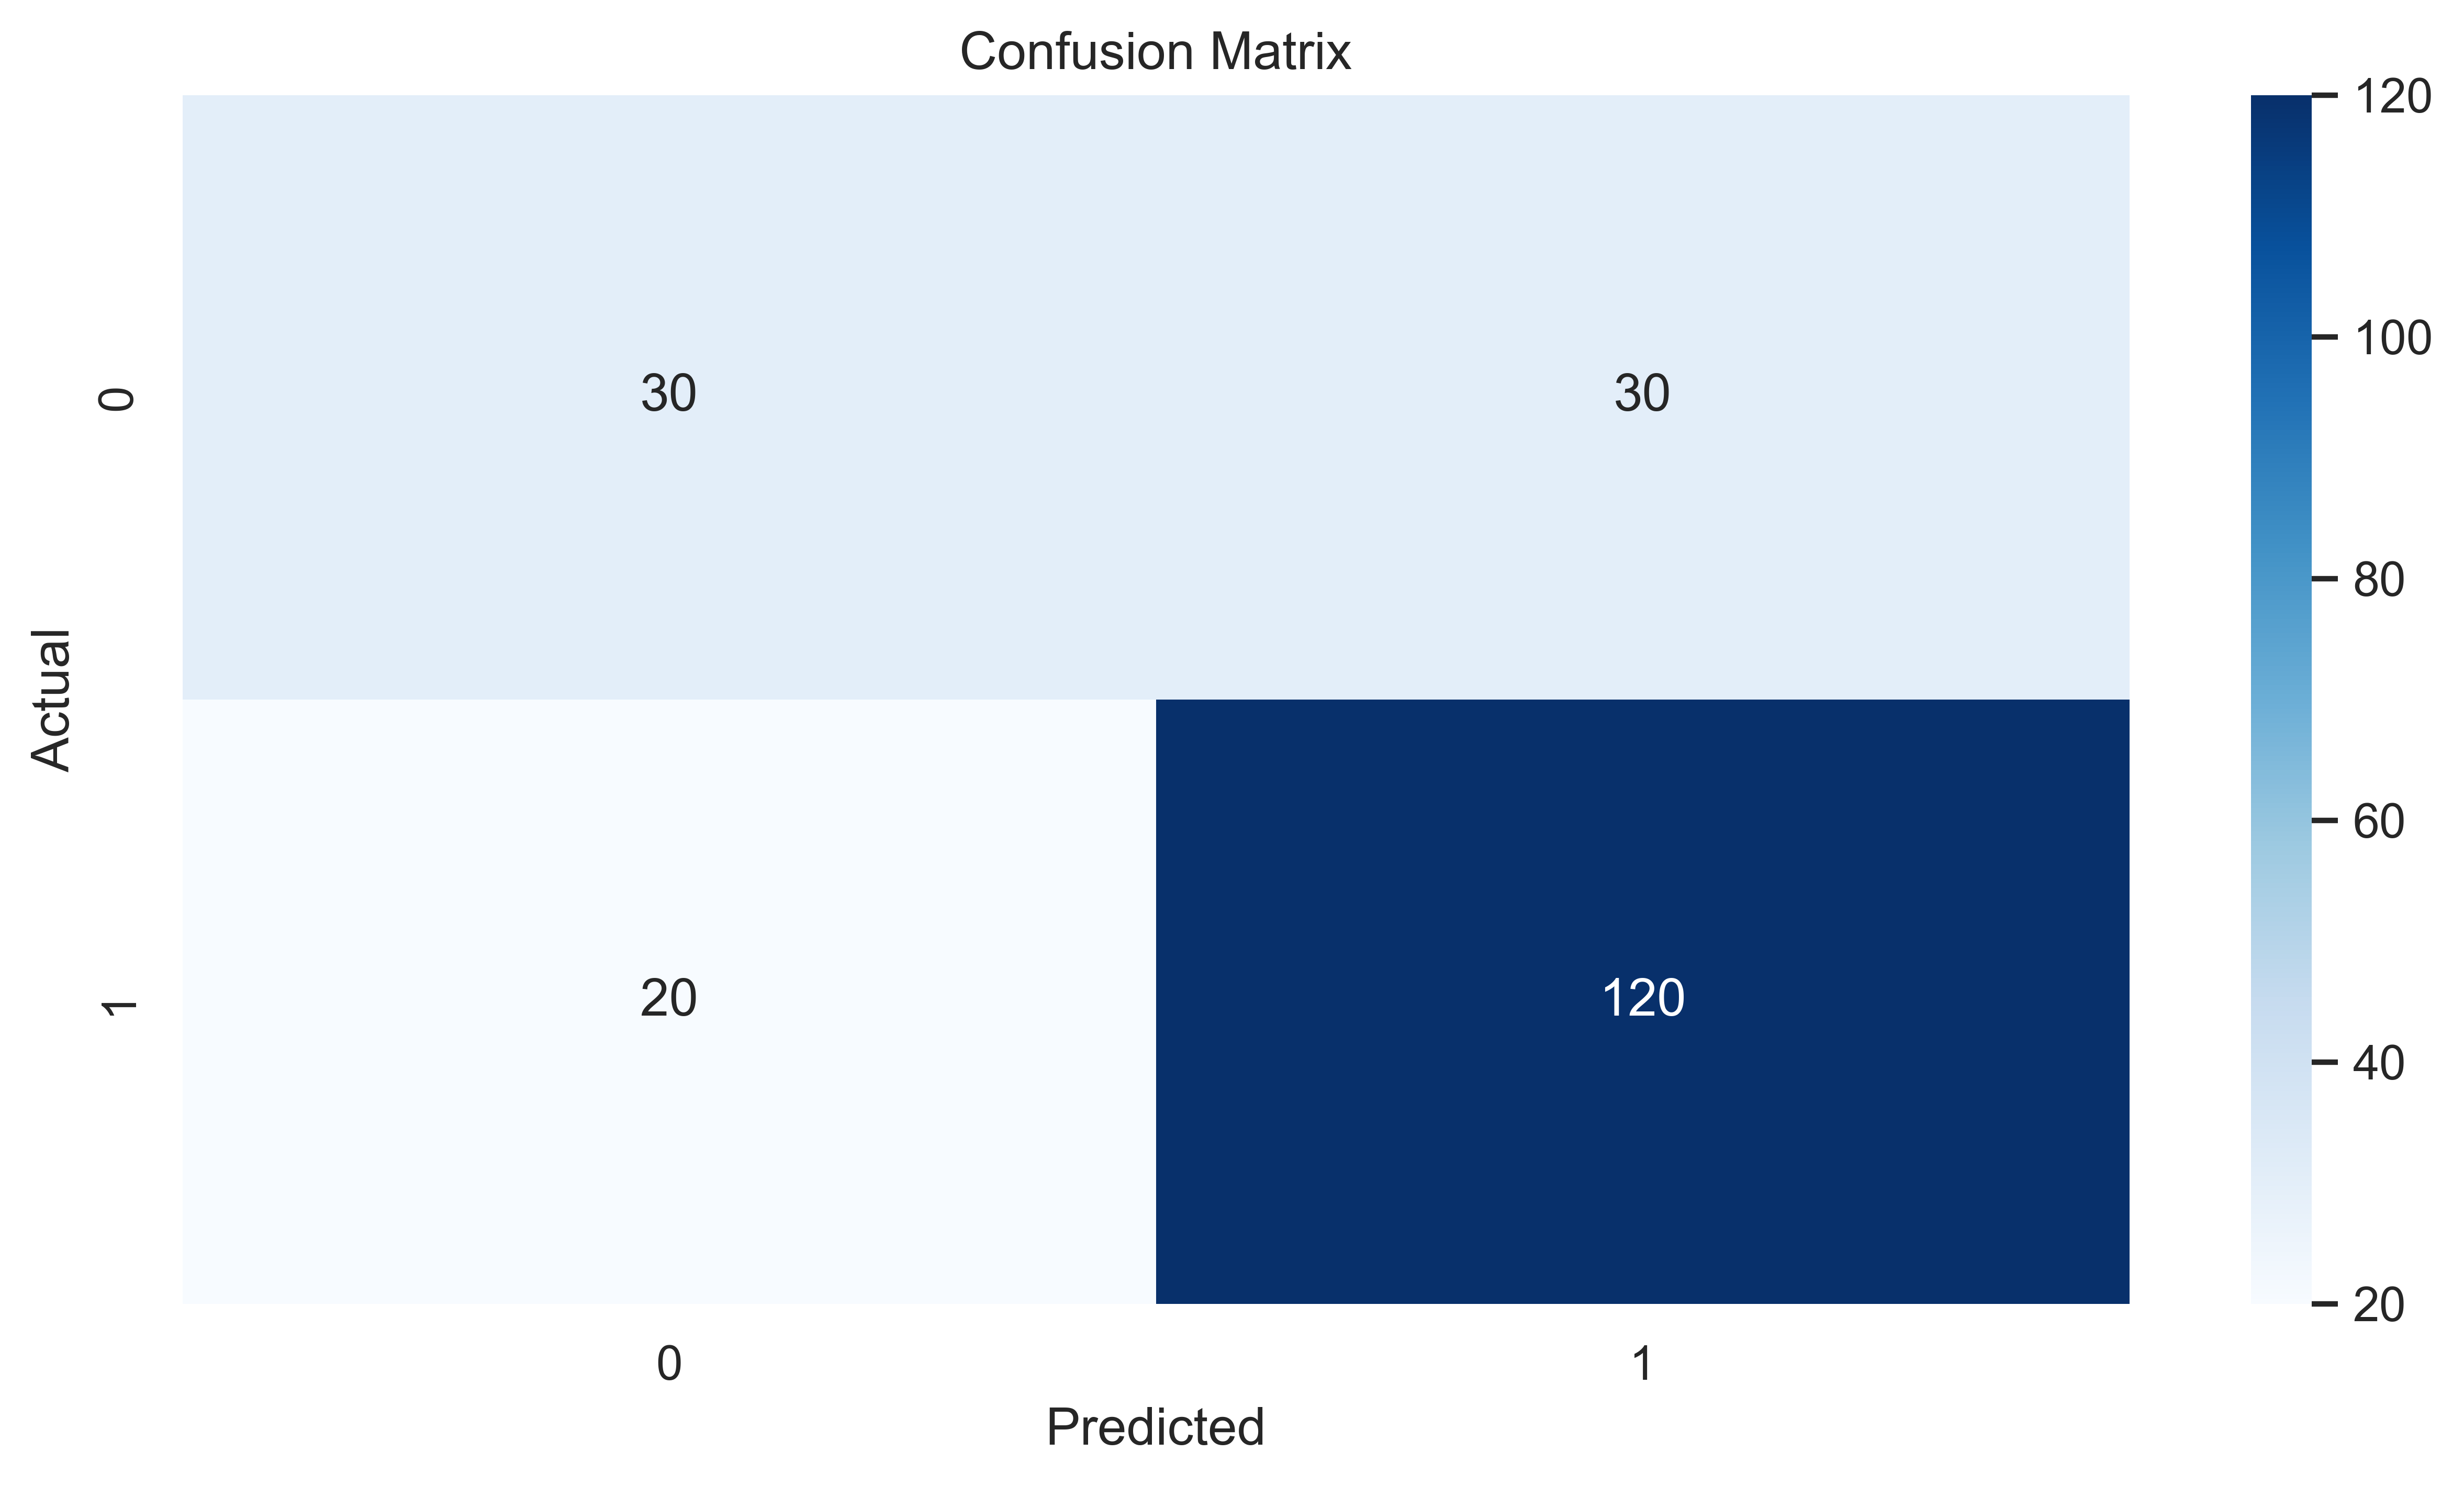

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set_theme(style='whitegrid')

# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Textual report
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_proba))

fig, ax = plt.subplots(figsize=(10, 5), dpi=600)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

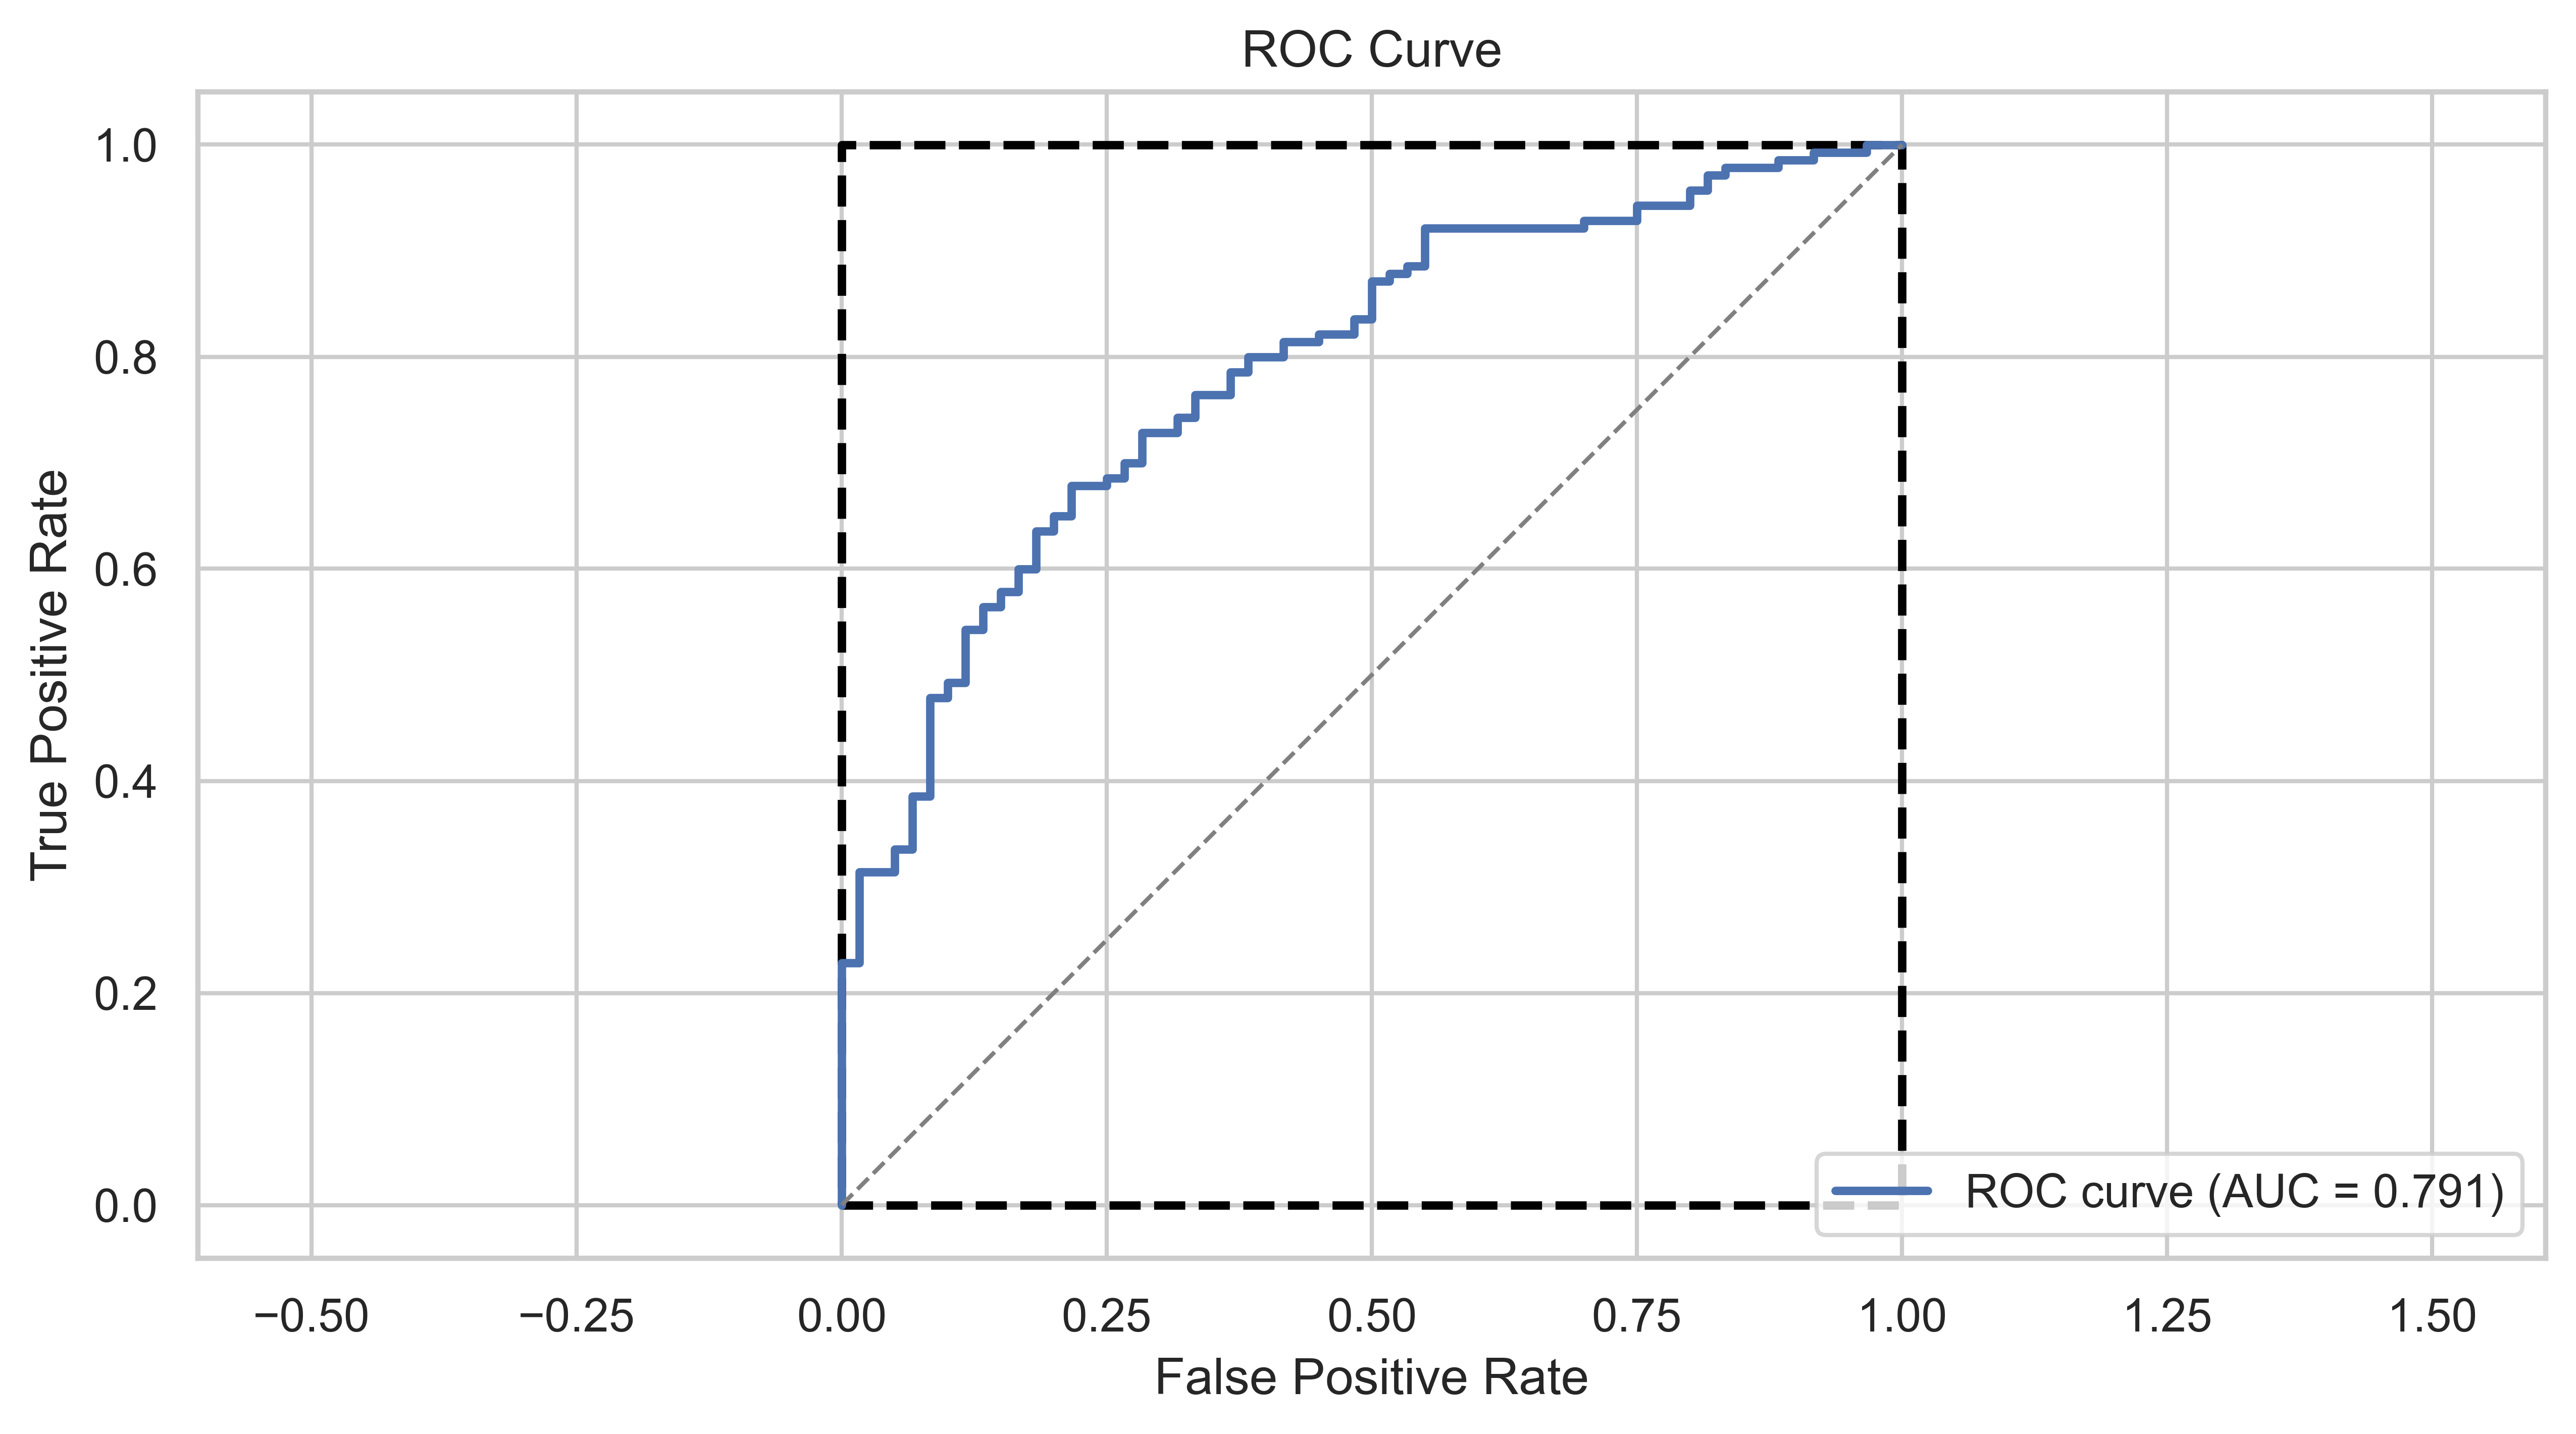

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 5), dpi=600)
ax.plot([0,1,1,0,0], [0,0,1,1,0], color='black',linestyle='--', lw=2)
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')  # noqa
ax.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

ax.set_aspect('equal', adjustable='datalim')
# ax.set_xlim([0.0, 1.0])
# ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc="lower right")

plt.show()